# **Data Processing and Cleaning**
***1: Load the dataset using pandas.***


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [2]:
#load the dataset
data=pd.read_csv('/content/Algerian_forest_fires_cleaned (1).csv')

**2: Check for missing values and handle them appropriately (e.g., imputation or removal).**

In [3]:
# Display basic information and first few rows
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57

In [4]:
# Check for missing values
print(data.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [5]:
# Handle missing values
# For numerical columns, we'll use mean imputation
# For categorical columns, we'll use mode imputation
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-5-da4703effd9d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-5-da4703effd9d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 


**3: Examine data types and convert if necessary.**


In [6]:
# Display data types
print(data.dtypes)

# Convert data types if needed
# For example, if 'date' column is not in datetime format:
if 'date' in data.columns and data['date'].dtype == 'object':
    data['date'] = pd.to_datetime(data['date'])

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object


**4:Remove any duplicate entries.**

In [7]:
# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [8]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize numerical features
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# **Data Visualization**
**1: Correlation heatmap to show relationships between numerical features.**

**Correlation Heatmap**

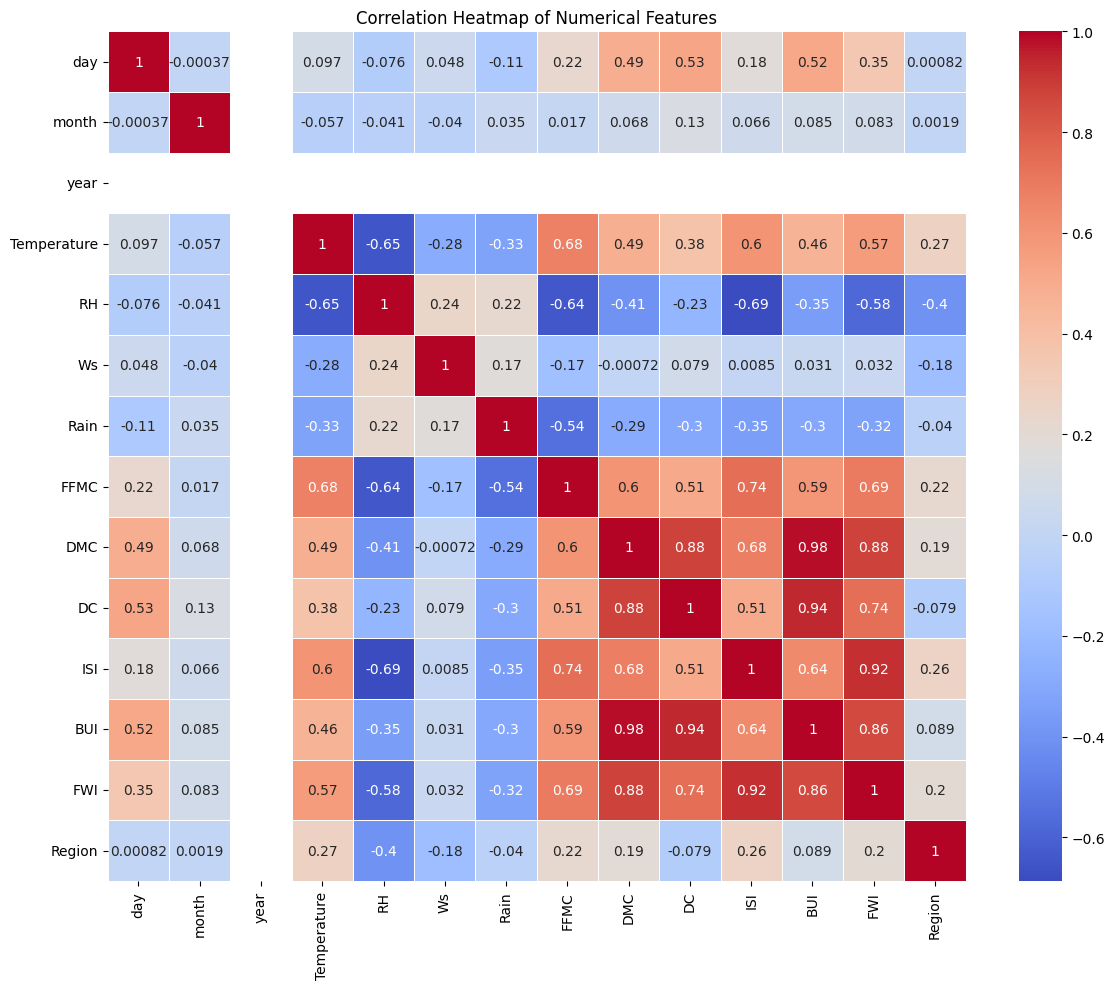

In [9]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Create correlation matrix
corr_matrix = data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

2. Scatter Plots of FWI vs Other Relevant Variables

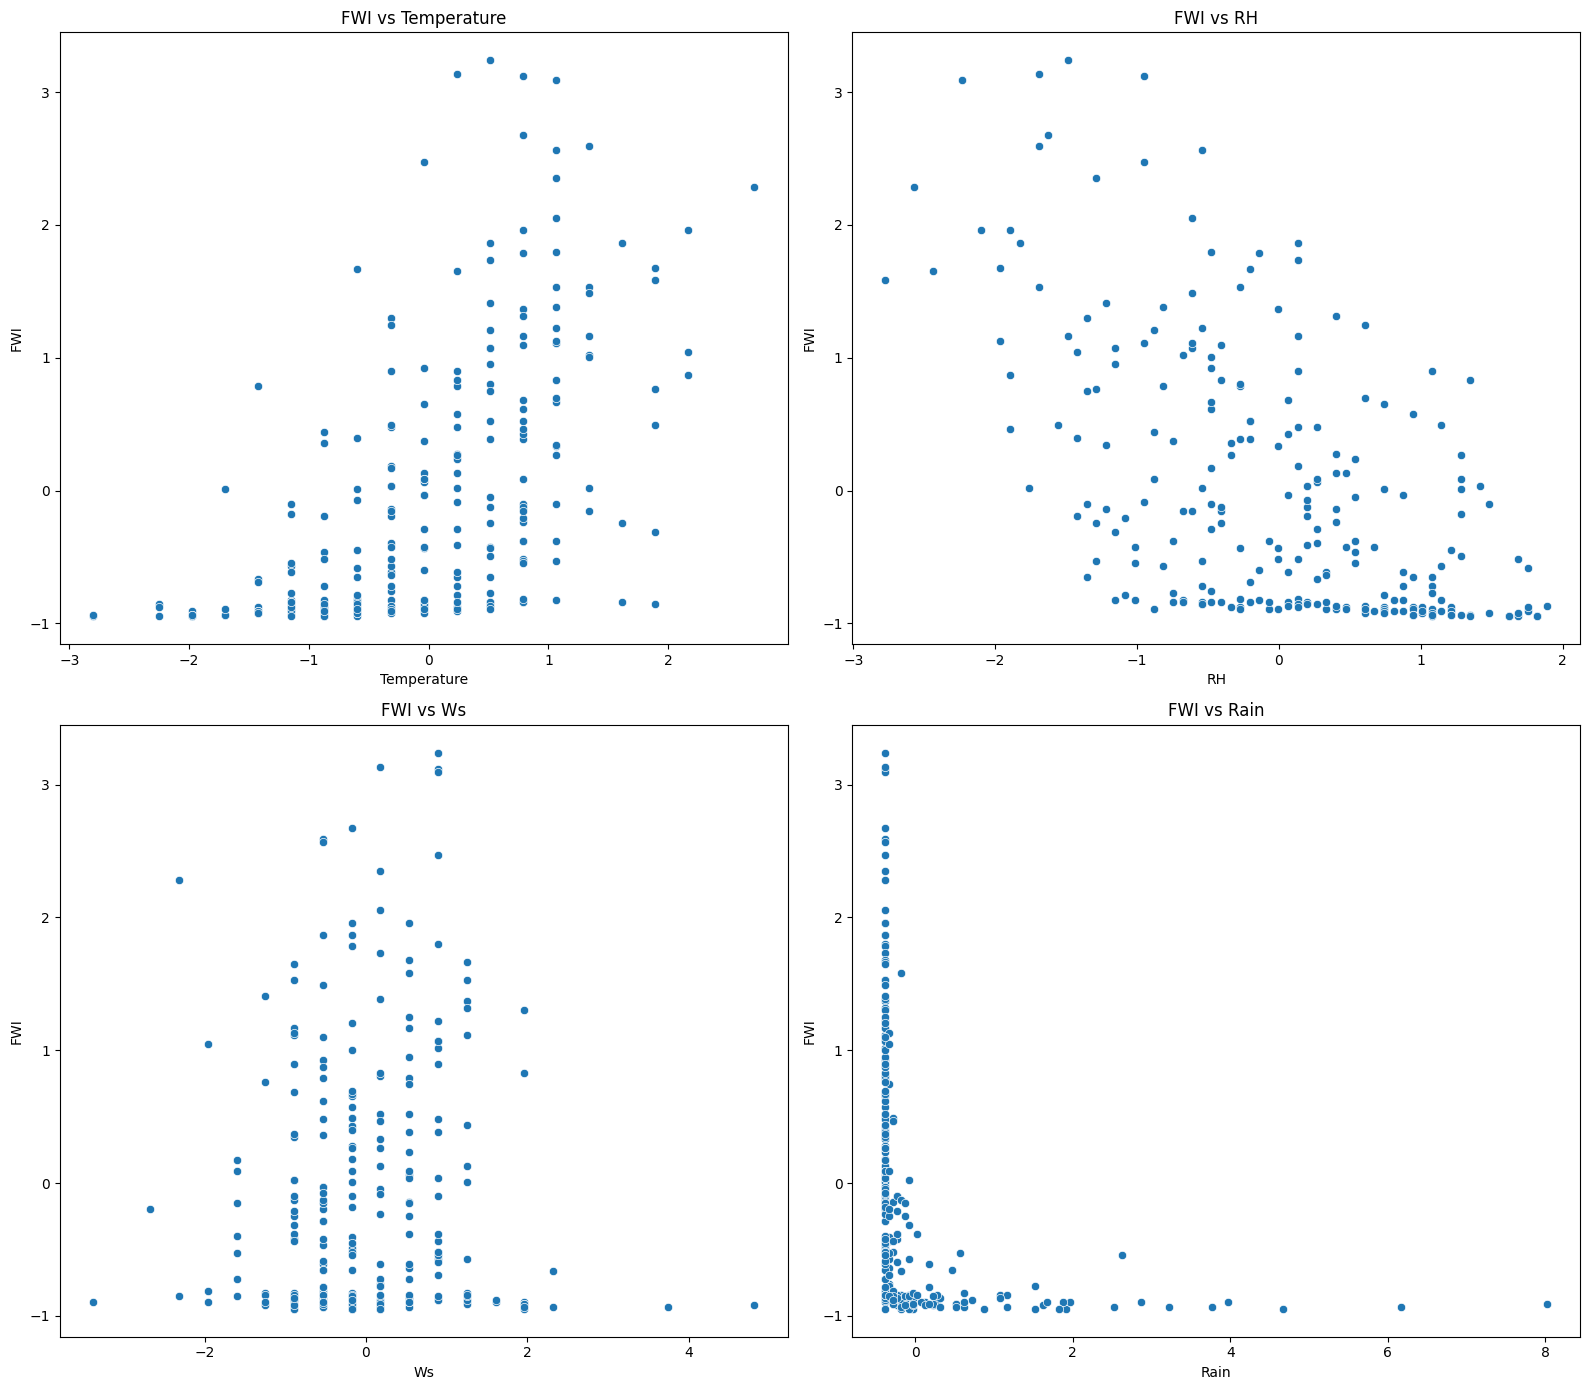

In [10]:
# Select relevant variables (adjust as needed)
relevant_vars = ['Temperature', 'RH', 'Ws', 'Rain']

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for i, var in enumerate(relevant_vars):
    sns.scatterplot(data=data, x=var, y='FWI', ax=axes[i])
    axes[i].set_title(f'FWI vs {var}')

plt.tight_layout()
plt.show()

**3. Histograms or Box Plots of Key Features**

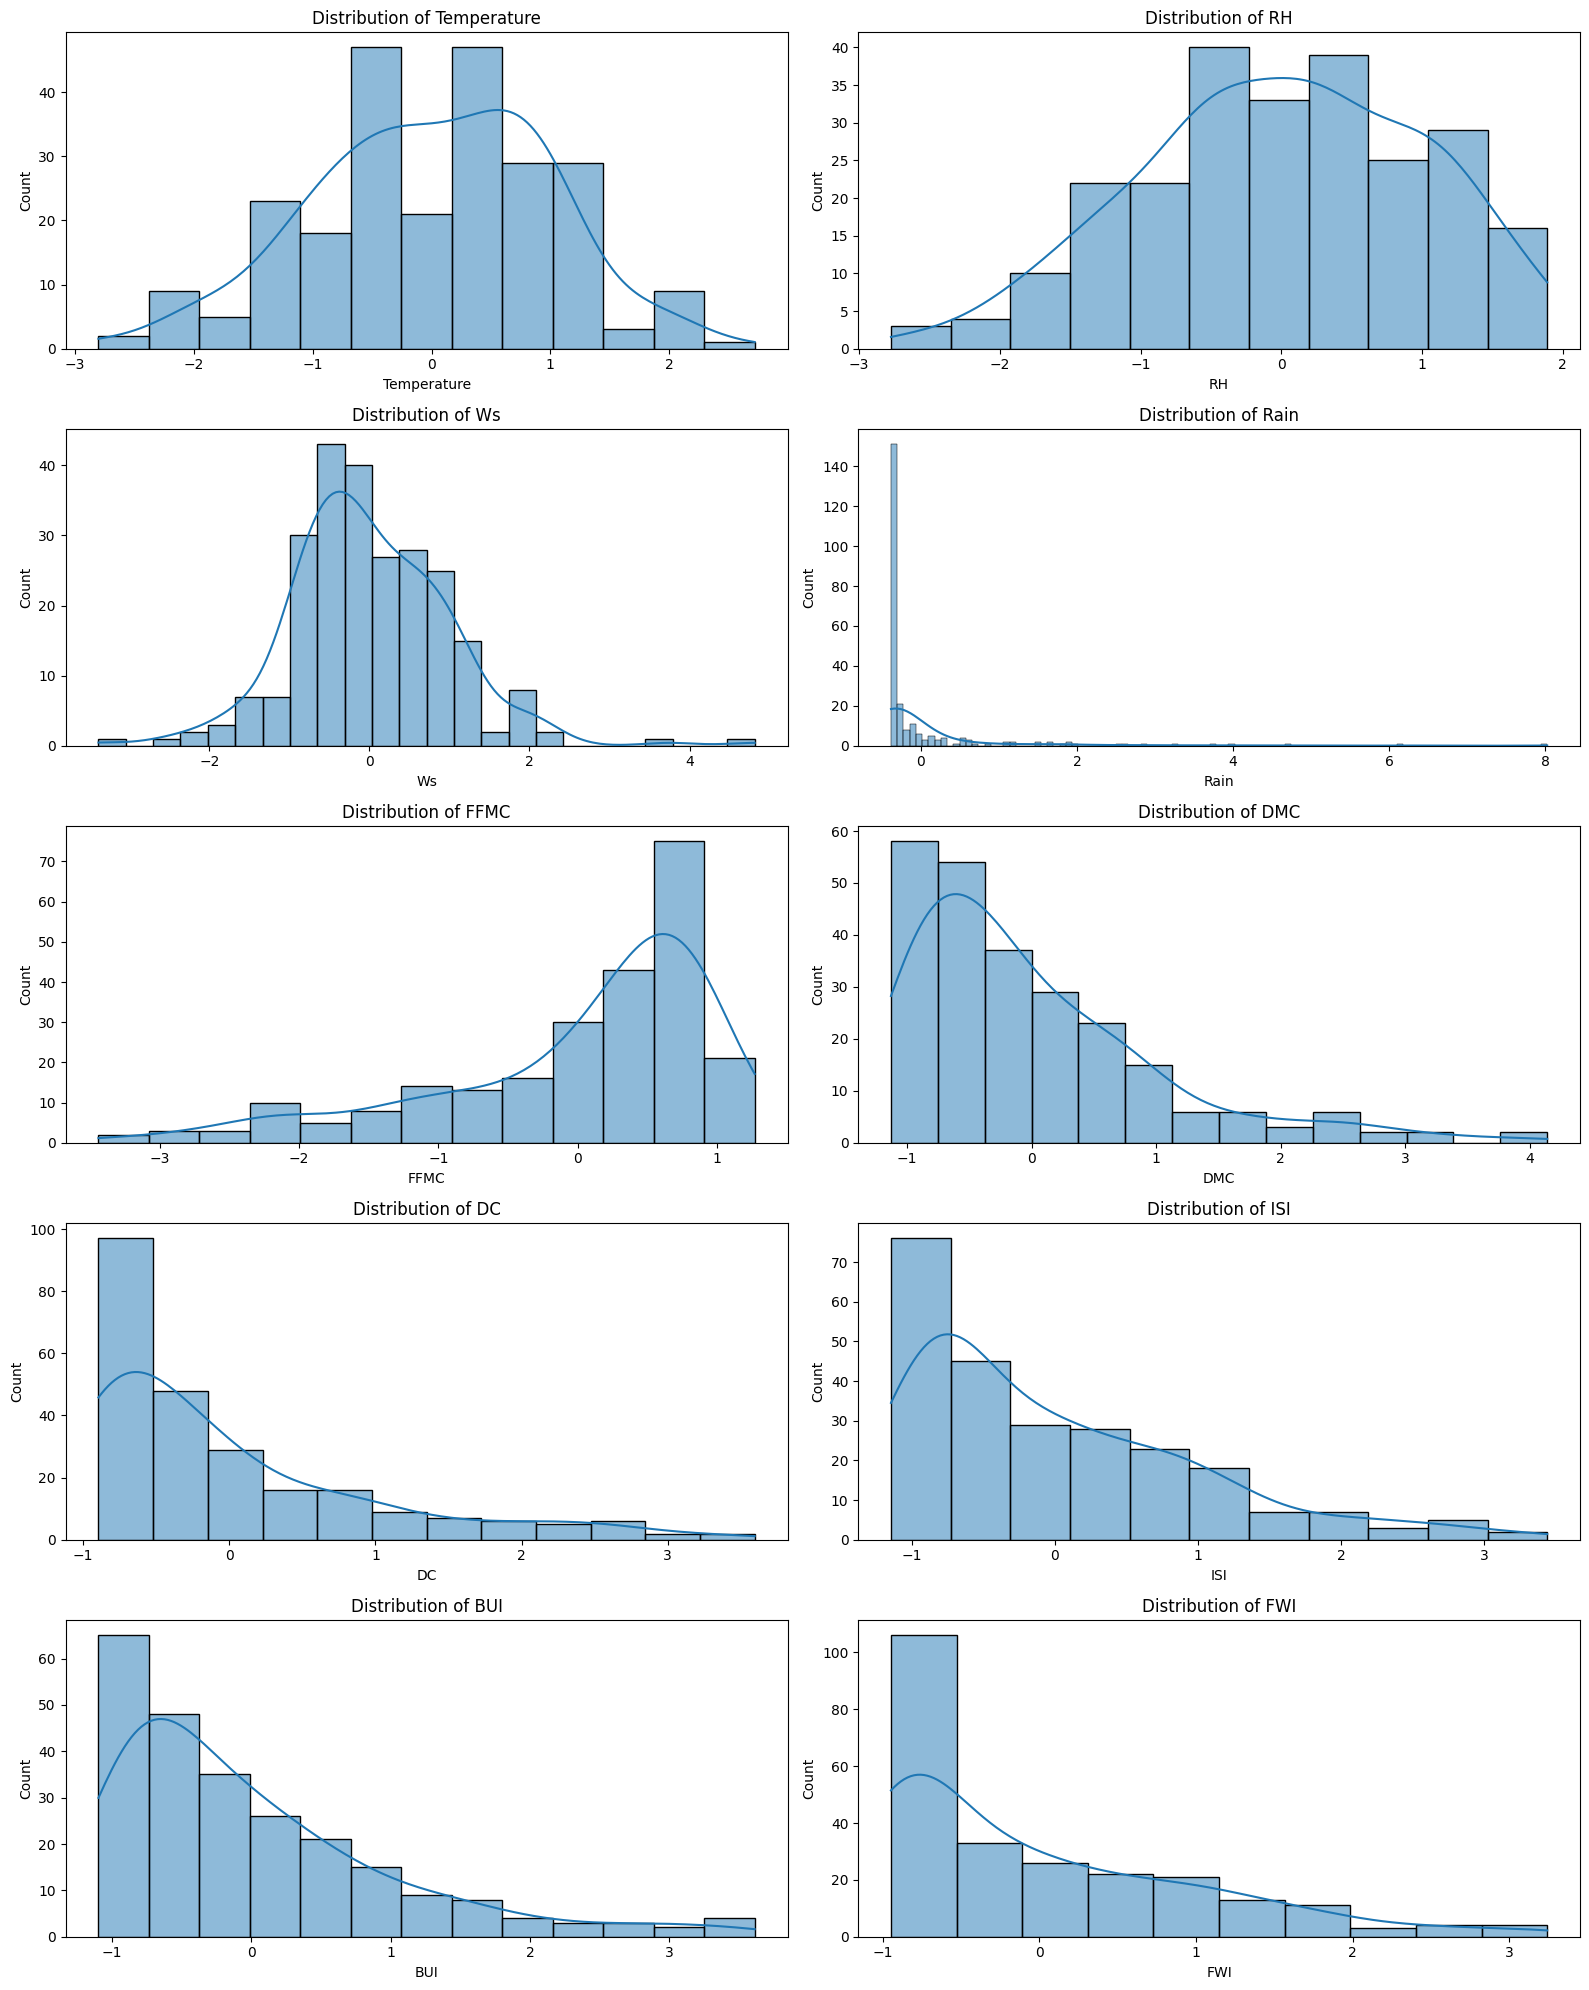

In [11]:
# Key features (adjust as needed)
key_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Histograms
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

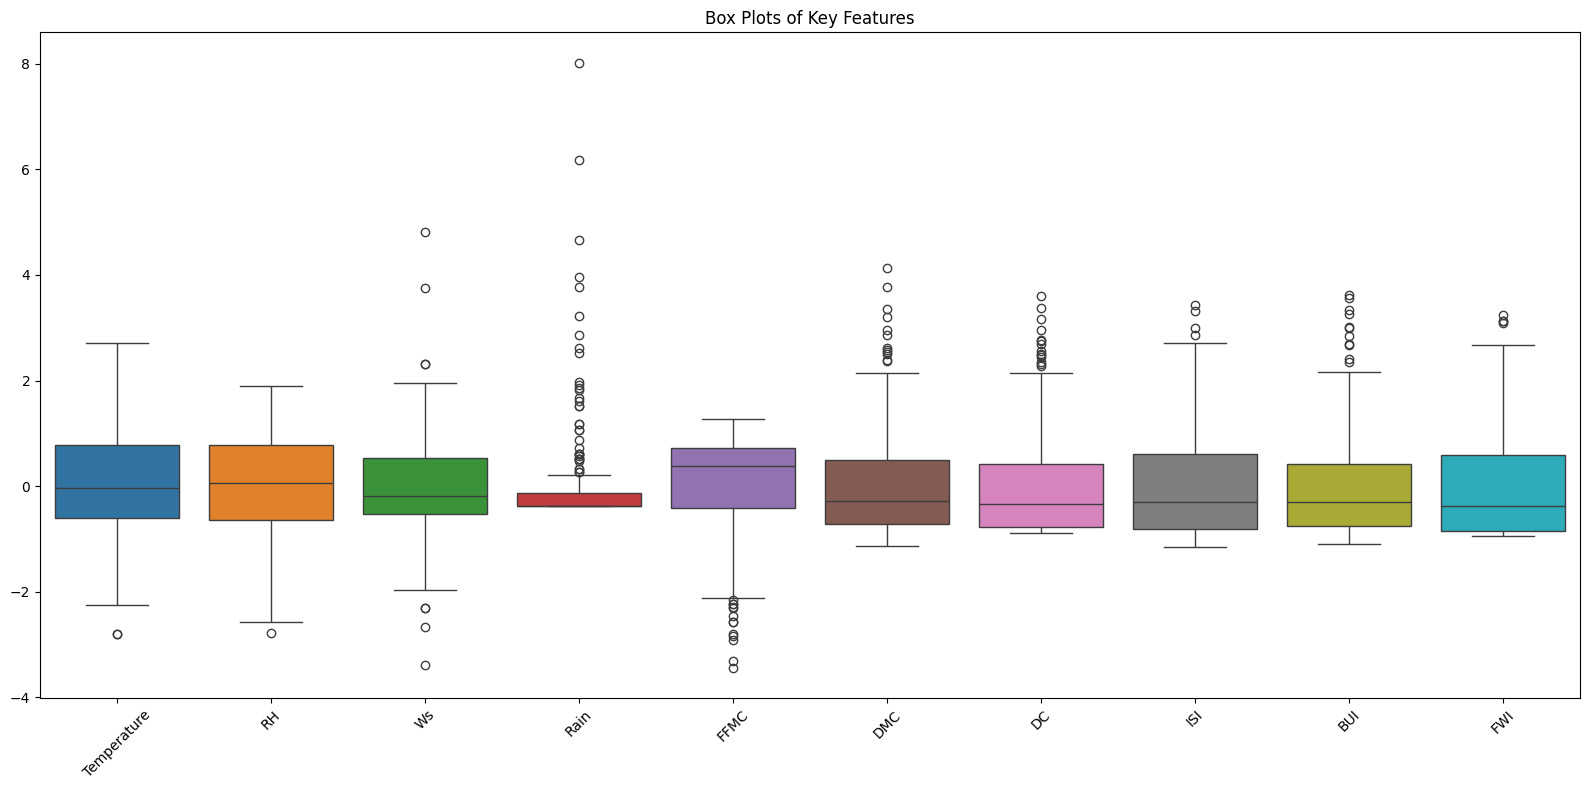

In [12]:
# Box Plots
plt.figure(figsize=(16, 8))
sns.boxplot(data=data[key_features])
plt.title('Box Plots of Key Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Assuming 'FWI' is your target variable
X = data.drop('FWI', axis=1)
y = data['FWI']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Calculate correlations

# Convert columns to numeric type, handling errors by setting non-convertible values to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Calculate correlations with the target variable
correlations = X.corrwith(y).abs().sort_values(ascending=False)

# Select top 5 features (you can adjust this number)
top_features = correlations.head(5).index.tolist()

print("Top correlated features:")
print(correlations.head(5))

# Use only the top features
X_train = X_train[top_features]
X_test = X_test[top_features]

Top correlated features:
ISI     0.922895
DMC     0.875864
BUI     0.857973
DC      0.739521
FFMC    0.691132
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [15]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Print the coefficients and intercept
for feature, coef in zip(top_features, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")

ISI: 0.677160897897261
DMC: 0.02647884694163463
BUI: 0.49765646988124634
DC: -0.04835265787346513
FFMC: -0.09650821064997736
Intercept: -0.0016244602247244416


In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

R-squared: 0.9907
Mean Squared Error: 0.0051
Mean Absolute Error: 0.0529


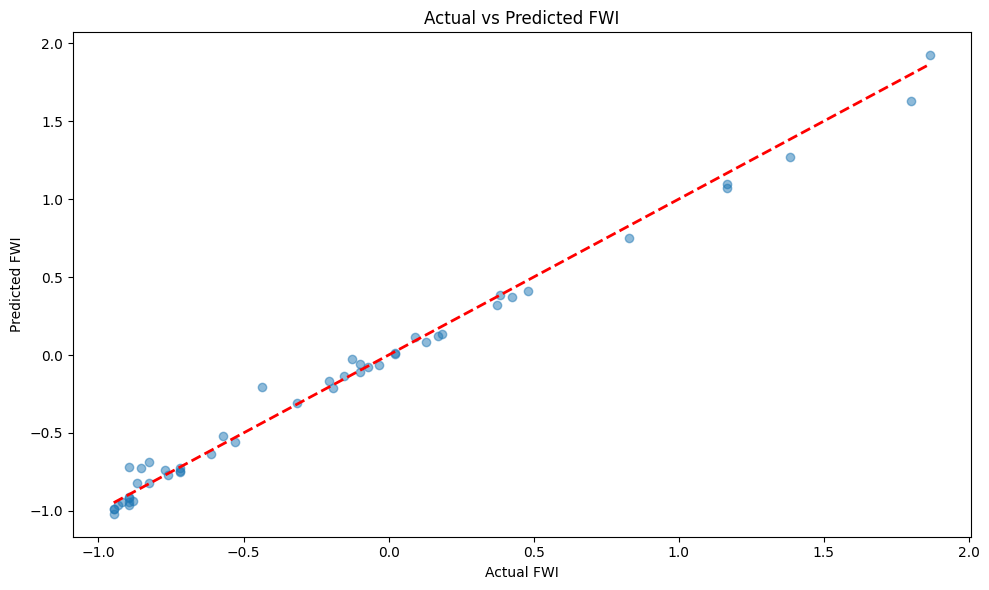

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI")
plt.tight_layout()
plt.show()

In [18]:
# Create an imputer to replace NaN with the mean
from sklearn.impute import SimpleImputer # import the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

In [19]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Impute missing values in X_train and X_test
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }


In [20]:
# Create and evaluate polynomial models
poly_results = {}
for degree in [2, 3]:
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_results[f'Poly_{degree}'] = evaluate_model(poly_model, X_train, X_test, y_train, y_test)

print("Polynomial Regression Results:")
for model, metrics in poly_results.items():
    print(f"{model}: {metrics}")

Polynomial Regression Results:
Poly_2: {'R2': 0.5066962479044124, 'MSE': 0.2711792756502545, 'MAE': 0.10237016215308156}
Poly_3: {'R2': -1.0256435314871393, 'MSE': 1.1135381461438092, 'MAE': 0.1716200087571649}


In [21]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_results = evaluate_model(ridge_model, X_train, X_test, y_train, y_test)


In [22]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_results = evaluate_model(lasso_model, X_train, X_test, y_train, y_test)


In [24]:
# Elastic Net
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_results = evaluate_model(elastic_net_model, X_train, X_test, y_train, y_test)
print("\nRegularization Models Results:")
print(f"Ridge: {ridge_results}")
print(f"Lasso: {lasso_results}")
print(f"Elastic Net: {elastic_net_results}")


Regularization Models Results:
Ridge: {'R2': 0.9846242580857787, 'MSE': 0.00845236335051399, 'MAE': 0.05848077954061989}
Lasso: {'R2': -0.11042875729098389, 'MSE': 0.6104256551550253, 'MAE': 0.6511456874005942}
Elastic Net: {'R2': 0.5825821659968669, 'MSE': 0.22946321690765073, 'MAE': 0.40433333833328955}


In [25]:
from sklearn.model_selection import GridSearchCV
# Polynomial Regression
poly_param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4]}
poly_model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Create the GridSearchCV object and assign it to poly_gs
poly_gs = GridSearchCV(poly_model, poly_param_grid, cv=5, scoring='neg_mean_squared_error')  # cv=5 for 5-fold cross-validation
poly_gs.fit(X_train, y_train)  # Fit the model

# Get the best parameters and score
poly_best_params = poly_gs.best_params_
poly_best_score = poly_gs.best_score_

#poly_best_params, poly_best_score = grid_search_cv(poly_model, poly_param_grid, X_train, y_train)


In [26]:
from sklearn.linear_model import Ridge
# Ridge Regression

ridge_param_grid = {'alpha': [0.1, 1.0, 10.0]}
# Create the GridSearchCV object and assign it to ridge_gs
ridge_gs = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')  # cv=5 for 5-fold cross-validation
ridge_gs.fit(X_train, y_train)  # Fit the model

# Get the best parameters and score
ridge_best_params = ridge_gs.best_params_
ridge_best_score = ridge_gs.best_score_

In [27]:
# Lasso Regression
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0]}
lasso_gs = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_gs.fit(X_train, y_train)

# Get the best parameters and score
lasso_best_params = lasso_gs.best_params_
lasso_best_score = lasso_gs.best_score_
#lasso_best_params, lasso_best_score = grid_search_cv(Lasso(), lasso_param_grid, X_train, y_train)


In [29]:
# Elastic Net
elastic_net_param_grid = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
elastic_net_gs = GridSearchCV(ElasticNet(), lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
elastic_net_gs.fit(X_train, y_train)

# Get the best parameters and score
elastic_net_best_params = elastic_net_gs.best_params_
elastic_net_best_score = elastic_net_gs.best_score_

#elastic_net_best_params, elastic_net_best_score = grid_search_cv(ElasticNet(), elastic_net_param_grid, X_train, y_train)
print("\nBest Parameters and Scores:")
print(f"Polynomial: {poly_best_params}, MSE: {poly_best_score:.4f}")
print(f"Ridge: {ridge_best_params}, MSE: {ridge_best_score:.4f}")
print(f"Lasso: {lasso_best_params}, MSE: {lasso_best_score:.4f}")
print(f"Elastic Net: {elastic_net_best_params}, MSE: {elastic_net_best_score:.4f}")


Best Parameters and Scores:
Polynomial: {'polynomialfeatures__degree': 2}, MSE: -0.0118
Ridge: {'alpha': 1.0}, MSE: -0.0402
Lasso: {'alpha': 0.1}, MSE: -0.0518
Elastic Net: {'alpha': 0.1}, MSE: -0.0458


In [30]:
# Identify the best model
# Assume 'model' refers to your fitted polynomial regression model from GridSearchCV
# Assuming higher scores are better (e.g., R^2 score).
# If lower scores are better (e.g., negative MSE), use min instead of max.

models = {
    "Polynomial": (poly_gs, poly_best_score),
    "Ridge": (ridge_gs, ridge_best_score),
    "Lasso": (lasso_gs, lasso_best_score),
    "Elastic Net": (elastic_net_gs, elastic_net_best_score)
}

best_model_name, (best_model, best_score) = min(models.items(), key=lambda item: item[1][1])

# Output the best model and its score
print(f"Best Model: {best_model_name}")
print(f"Best Score: {best_score}")


Best Model: Lasso
Best Score: -0.05175524587759909


In [31]:
# Fit the best model on the entire training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate final MSE and R-squared
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print(f"\nFinal Model Performance:")
print(f"MSE: {final_mse:.4f}")
print(f"R-squared: {final_r2:.4f}")

# Feature importance (if applicable)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_imp = feature_imp.sort_values('importance', ascending=False)
    print("\nFeature Importances:")
    print(feature_imp)
elif hasattr(best_model, 'coef_'):
    coefficients = best_model.coef_
    feature_imp = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients})
    feature_imp = feature_imp.sort_values('coefficient', key=abs, ascending=False)
    print("\nFeature Coefficients:")
    print(feature_imp)


Final Model Performance:
MSE: 0.0195
R-squared: 0.9645


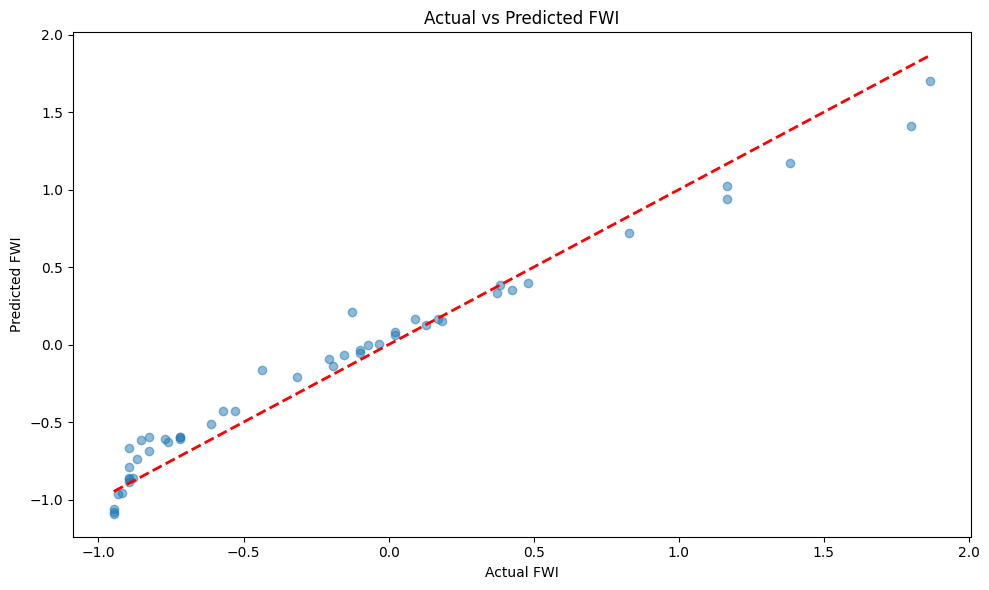

In [32]:
# Visualize actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI")
plt.tight_layout()
plt.show()

In [34]:
# Save the best model using pickle
import pickle

model_filename = 'best_fwi_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"\nBest model saved as {model_filename}")

# Example of how to load and use the model
print("\nExample: Loading and using the saved model")
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Use a small subset of the test data for demonstration
sample_data = X_test.iloc[:5]
sample_predictions = loaded_model.predict(sample_data)

print("Sample Predictions:")
print(sample_predictions)




Best model saved as best_fwi_model.pkl

Example: Loading and using the saved model
Sample Predictions:
[ 0.15422828  0.0633733  -0.85772523 -0.16240159 -0.00323935]

Actual Values:
[ 0.18377974  0.02216885 -0.88015863 -0.43572868 -0.07210417]

Assignment Completed!


In [36]:
#predictions with actual values
print("\nActual Values:")
print(y_test.iloc[:5].values)




Actual Values:
[ 0.18377974  0.02216885 -0.88015863 -0.43572868 -0.07210417]


# **Assignment Completed!**